In [30]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

In [2]:
data = pd.read_csv("../data/raw/aug_train.csv")

In [10]:
shape = data.shape
data.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [11]:
data.describe()

,enrollee_id,city_development_index,training_hours,target
count,19158.000000,19158.000000,19158.000000,19158.000000
mean,16875.358179,0.828848,65.366896,0.249348
std,9616.292592,0.123362,60.058462,0.432647
min,1.000000,0.448000,1.000000,0.000000
25%,8554.250000,0.740000,23.000000,0.000000
50%,16982.500000,0.903000,47.000000,0.000000
75%,25169.750000,0.920000,88.000000,0.000000
max,33380.000000,0.949000,336.000000,1.000000


In [27]:
df = (
    data.dropna(axis = 0)
    .drop(columns='target')
    .rename(columns = {"city_development_index": "city_index"})
    .sort_values("city_index", ascending= True)
    .loc[:, ["enrollee_id", "city_index", "company_type", "training_hours"]]
)
df

,enrollee_id,city_index,company_type,training_hours
16555,30131,0.448,Pvt Ltd,16
10401,19463,0.448,Pvt Ltd,36
7724,31179,0.448,Pvt Ltd,28
17701,24256,0.448,Public Sector,44
16362,11477,0.479,Other,43
...,...,...,...,...
16947,5963,0.949,Pvt Ltd,134
2449,6104,0.949,Pvt Ltd,67
18537,29857,0.949,Pvt Ltd,105
2929,19552,0.949,Pvt Ltd,14


<AxesSubplot:ylabel='Frequency'>

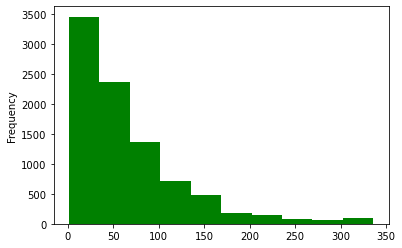

In [23]:
df['training_hours'].plot(kind='hist', facecolor='green')

<AxesSubplot:>

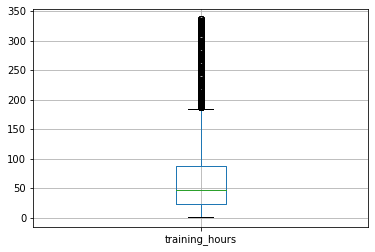

In [24]:
df.boxplot('training_hours')

<AxesSubplot:>

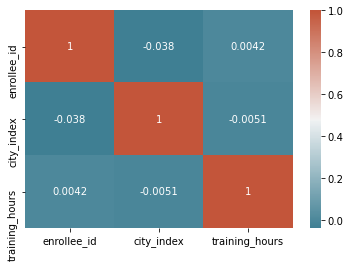

In [31]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))